In [1]:
import pandas as pd

In [8]:

# Assuming you've loaded the CSV into combined_week1_order_data DataFrame
# Load the CSV file into a DataFrame
combined_week1_order_data = pd.read_csv("combined_week1_order_data.csv")

combined_week1_order_data['Completed (%)'] = combined_week1_order_data['Completed (%)'].str.rstrip('%').astype(float)

# Group by 'delivery_runs'
delivery_runs_grouped = combined_week1_order_data.groupby('Delivery Run')

# Calculate average % of line completion
avg_line_completion = delivery_runs_grouped['Completed (%)'].mean().sort_values(ascending=False)

# Calculate total lines
total_lines = delivery_runs_grouped['Total Lines'].sum()

# Calculate average amount of lines
avg_lines = delivery_runs_grouped['Total Lines'].mean().sort_values(ascending=False)

# Calculate how many lines were picked
lines_picked = delivery_runs_grouped['Picked Lines'].sum().sort_values(ascending=False)

# Calculate the average units picked
avg_units_picked = delivery_runs_grouped['Units Picked'].mean()

# Rank the runs by total units ordered
ranked_by_units_ordered = delivery_runs_grouped['Units Ordered'].sum().sort_values(ascending=False)

# Rank the runs by units picked
ranked_by_units_picked = delivery_runs_grouped['Units Picked'].sum().sort_values(ascending=False)

# Display the results
print("Average % of line completion:")
print(avg_line_completion)

print("\nTotal lines:")
print(total_lines)

print("\nAverage amount of lines:")
print(avg_lines)

print("\nLines picked:")
print(lines_picked)

print("\nAverage units picked:")
print(avg_units_picked)

print("\nRuns ranked by total units ordered:")
print(ranked_by_units_ordered)

print("\nRuns ranked by units picked:")
print(ranked_by_units_picked)


Average % of line completion:
Delivery Run
Cannonvale                   99.165000
Pallet Run 1                 98.853333
Proserpine Run               98.684000
Dingo Run                    98.530000
North Mackay                 98.105000
Pallet Run 3                 98.015000
Mackay                       97.968333
Shute                        97.895000
Collinsville                 97.720000
2nd Run                      97.685714
Pallet                       97.220000
Pallet Run 2                 97.156667
Bowen                        96.900000
Airlie Run                   96.065000
Hayman Island                90.600000
Hayman Comms                 90.558000
Hayman Grove                 89.470000
Pick Up Window 2             86.412000
Hayman Diner                 85.980000
Hayman Retail                84.930000
Hamilton Island Warehouse    83.330000
pick Up Window 1             78.425714
Hamilton Island              76.733333
Daydream                     55.775000
Hayman Stores        

In [9]:


# Filter the DataFrame for specific dates (01/12/23 and 03/12/23)
specific_dates = combined_week1_order_data[
    (combined_week1_order_data['Date'] == '2023-11-30') | (combined_week1_order_data['Date'] == '2023-12-03')
]

# Filter the rest of the week (excluding 01/12/23 and 03/12/23)
rest_of_week = combined_week1_order_data[
    ~(combined_week1_order_data['Date'].isin(['2023-11-30', '2023-12-03']))
]

# Perform analysis for specific dates
specific_dates_stats = specific_dates.groupby('Delivery Run').agg({
     'Completed (%)': 'mean',
    'Total Lines': 'sum',
    'Picked Lines': 'sum',
    'Units Picked': 'mean',
    'Units Ordered': 'sum'
})

# Perform analysis for the rest of the week
rest_of_week_stats = rest_of_week.groupby('Delivery Run').agg({
    'Completed (%)': 'mean',
    'Total Lines': 'sum',
    'Picked Lines': 'sum',
    'Units Picked': 'mean',
    'Units Ordered': 'sum'
})

# Display the statistics for specific dates and the rest of the week
print("Statistics for specific dates (30/11/23 and 03/12/23):")
print(specific_dates_stats)

print("\nStatistics for the rest of the week:")
print(rest_of_week_stats)


Statistics for specific dates (30/11/23 and 03/12/23):
                           Completed (%)  Total Lines  Picked Lines  \
Delivery Run                                                          
2nd Run                           99.055          356           350   
Airlie Run                        96.085          362           349   
Bowen                             96.365          248           239   
Cannonvale                        98.865          258           255   
Hamilton Island                   85.860          929           765   
Hamilton Island Warehouse         83.330           30            25   
Hayman Comms                      86.550          394           341   
Hayman Retail                     90.200          102            92   
Hayman Stores                     84.620           26            22   
Mackay                            98.035          730           716   
North Mackay                      98.190          166           163   
Pallet                

In [10]:


# Filter the DataFrame for specific locations
specific_locations = combined_week1_order_data[
    (combined_week1_order_data['Delivery Run'].isin(['Pallet', 'Pallet Run 1', 'Pallet Run 2', 'Pallet Run 3', 'Bowen', 'Mackay', 'Airlie Run', 'Cannonvale', 'North Mackay']))
]

# Perform analysis for specific locations
specific_locations_stats = specific_locations.groupby('Delivery Run').agg({
    'Completed (%)': 'mean',
    'Total Lines': 'sum',
    'Picked Lines': 'sum',
    'Units Picked': 'mean',
    'Units Ordered': 'sum'
})

# Display the statistics for specific locations
print("Statistics for specific locations:")
print(specific_locations_stats)




Statistics for specific locations:
              Completed (%)  Total Lines  Picked Lines  Units Picked  \
Delivery Run                                                           
Airlie Run        96.065000         1044          1005    527.000000   
Bowen             96.900000          638           619    493.750000   
Cannonvale        99.165000          627           621    291.833333   
Mackay            97.968333         1724          1691    825.333333   
North Mackay      98.105000          368           361    467.000000   
Pallet            97.220000           84            82     65.500000   
Pallet Run 1      98.853333          903           891    616.166667   
Pallet Run 2      97.156667          787           766    486.166667   
Pallet Run 3      98.015000          601           592    432.000000   

              Units Ordered  
Delivery Run                 
Airlie Run             3288  
Bowen                  2073  
Cannonvale             1774  
Mackay                

In [18]:


# Convert 'Date' column to datetime if it's not already
combined_week1_order_data['Date'] = pd.to_datetime(combined_week1_order_data['Date'])

# Filter the DataFrame for specific dates (01/12/23 and 03/12/23)
specific_dates = combined_week1_order_data[
    (combined_week1_order_data['Date'].isin(['2023-11-30', '2023-12-03'])) &
    (combined_week1_order_data['Delivery Run'].isin(['Pallet', 'Pallet Run 1', 'Pallet Run 2', 'Pallet Run 3', 'Bowen', 'Mackay', 'Airlie Run', 'Cannonvale', 'North Mackay']))
]

# Filter the rest of the week (excluding 01/12/23 and 03/12/23) for specific locations
rest_of_week = combined_week1_order_data[
    ~(combined_week1_order_data['Date'].isin(['2023-11-30', '2023-12-03'])) &
    (combined_week1_order_data['Delivery Run'].isin(['Pallet', 'Pallet Run 1', 'Pallet Run 2', 'Pallet Run 3', 'Bowen', 'Mackay', 'Airlie Run', 'Cannonvale', 'North Mackay']))
]

# Perform analysis for specific dates and specific locations
specific_dates_stats = specific_dates.groupby(['Date', 'Delivery Run']).agg({
    'Completed (%)': 'mean',
    'Total Lines': 'sum',
    'Picked Lines': 'sum',
    'Units Picked': 'mean',
    'Units Ordered': 'sum'
})

# Perform analysis for the rest of the week and specific locations
rest_of_week_stats = rest_of_week.groupby(['Date', 'Delivery Run']).agg({
    'Completed (%)': 'mean',
    'Total Lines': 'sum',
    'Picked Lines': 'sum',
    'Units Picked': 'mean',
    'Units Ordered': 'sum'
})

# Display the statistics for specific dates and specific locations
print("Statistics for specific dates (30/11/23 and 03/12/23) and specific locations:")
print(specific_dates_stats)

print("\nStatistics for the rest of the week and specific locations:")
print(rest_of_week_stats)


Statistics for specific dates (30/11/23 and 03/12/23) and specific locations:
                         Completed (%)  Total Lines  Picked Lines  \
Date       Delivery Run                                             
2023-11-30 Airlie Run            93.63          157           147   
           Bowen                 95.93          123           118   
           Cannonvale            97.73          132           129   
           Mackay                97.35          340           331   
           North Mackay          98.19          166           163   
           Pallet Run 1          96.57          204           197   
           Pallet Run 2          98.06          155           152   
           Pallet Run 3          98.07          207           203   
2023-12-03 Airlie Run            98.54          205           202   
           Bowen                 96.80          125           121   
           Cannonvale           100.00          126           126   
           Mackay        

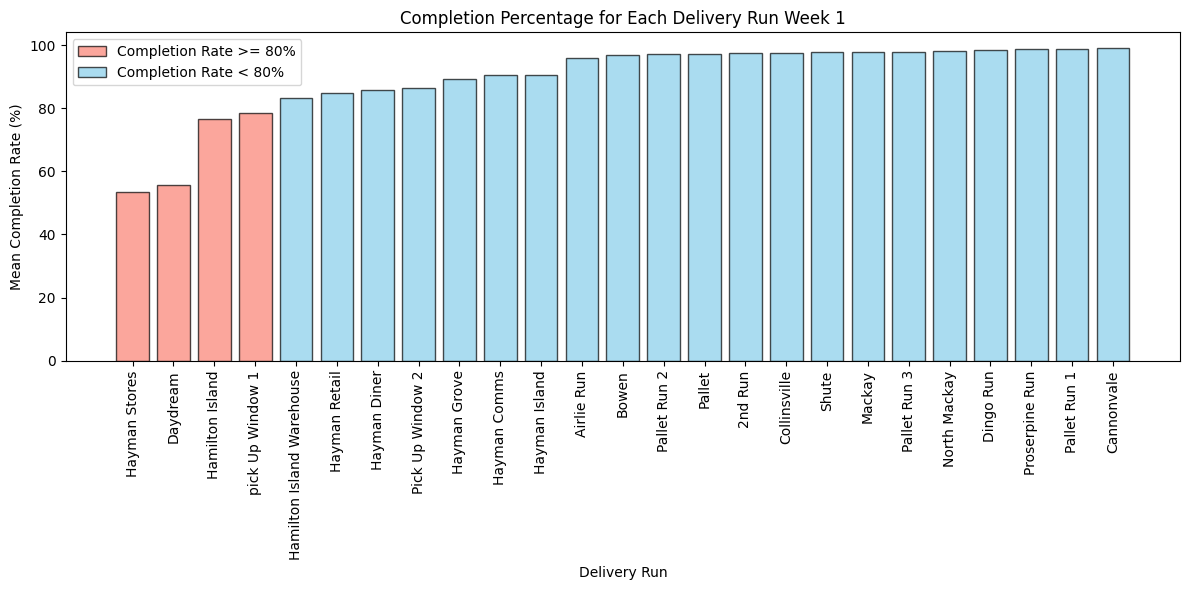

In [27]:
import matplotlib.pyplot as plt

# Calculate mean completion rate for each delivery run
mean_completion_rate = combined_week1_order_data.groupby('Delivery Run')['Completed (%)'].mean().sort_values()

# Define a threshold (e.g., 80%)
threshold = 80

# Create a list of colors based on the completion rate
colors = ['skyblue' if rate >= threshold else 'salmon' for rate in mean_completion_rate.values]

# Create a bar plot for completion percentages of all delivery runs
plt.figure(figsize=(12, 6))
bars = plt.bar(mean_completion_rate.index, mean_completion_rate.values, color=colors, alpha=0.7, edgecolor='black')

plt.xlabel('Delivery Run')
plt.ylabel('Mean Completion Rate (%)')
plt.title('Completion Percentage for Each Delivery Run Week 1')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Create a custom legend for color reference
plt.legend(handles=[bars[0], bars[-1]], labels=['Completion Rate >= 80%', 'Completion Rate < 80%'])

plt.tight_layout()
plt.show()


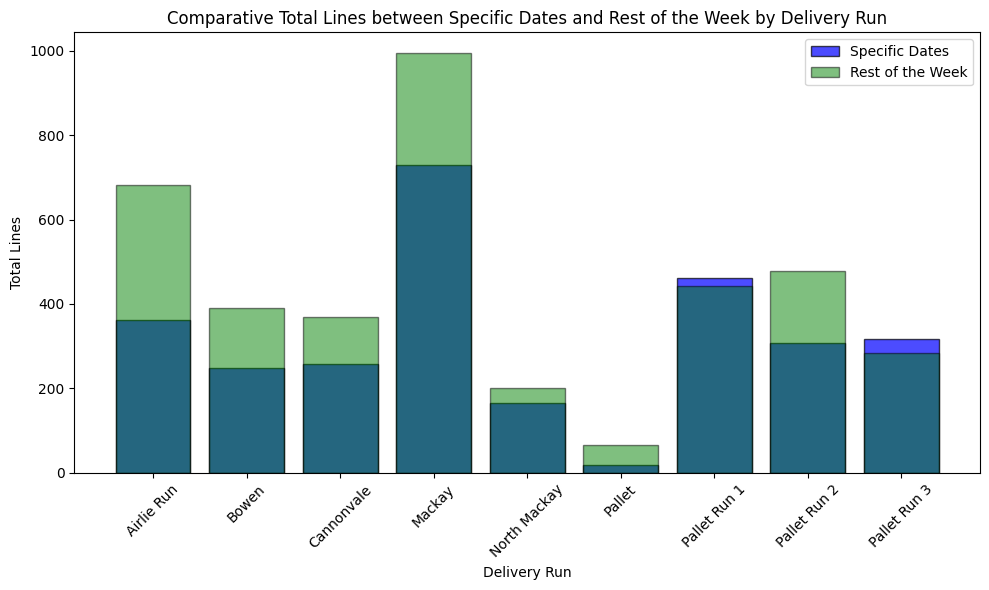

In [16]:

import matplotlib.pyplot as plt

# Calculate total 'Total Lines' for specific dates and rest of the week for each delivery run
total_lines_specific_dates = specific_dates.groupby('Delivery Run')['Total Lines'].sum()
total_lines_rest_of_week = rest_of_week.groupby('Delivery Run')['Total Lines'].sum()

# Create a bar plot for comparison
plt.figure(figsize=(10, 6))

# Bar plot for specific dates total sum
plt.bar(total_lines_specific_dates.index, total_lines_specific_dates, color='blue', alpha=0.7, label='Specific Dates', edgecolor='black')

# Bar plot for rest of the week total sum
plt.bar(total_lines_rest_of_week.index, total_lines_rest_of_week, color='green', alpha=0.5, label='Rest of the Week', edgecolor='black')

plt.xlabel('Delivery Run')
plt.ylabel('Total Lines')
plt.title('Comparative Total Lines between Specific Dates and Rest of the Week by Delivery Run')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


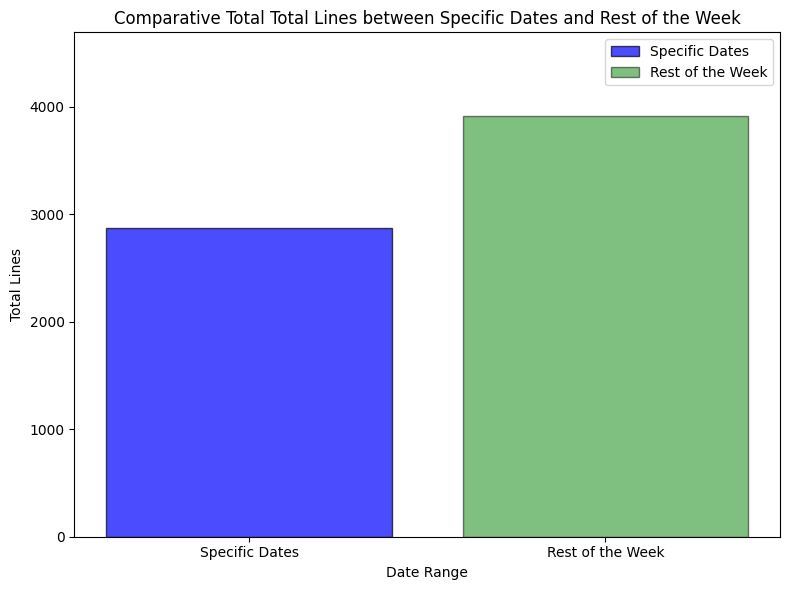

In [20]:
import matplotlib.pyplot as plt

# Assuming you have specific_dates_stats and rest_of_week_stats DataFrames

# Select the metric for comparison (e.g., 'Total Lines')
metric = 'Total Lines'

# Filter for specific delivery runs
specific_delivery_runs = ['Pallet', 'Pallet Run 1', 'Pallet Run 2', 'Pallet Run 3', 'Bowen', 'Mackay', 'Airlie Run', 'Cannonvale', 'North Mackay']

# Calculate the total sum for specific dates and rest of the week for the selected delivery runs
total_specific_dates = specific_dates_stats.loc[
    specific_dates_stats.index.get_level_values('Delivery Run').isin(specific_delivery_runs), metric
].sum()

total_rest_of_week = rest_of_week_stats.loc[
    rest_of_week_stats.index.get_level_values('Delivery Run').isin(specific_delivery_runs), metric
].sum()

# Create a bar plot for comparison
plt.figure(figsize=(8, 6))

# Bar plot for specific dates total sum
plt.bar('Specific Dates', total_specific_dates, color='blue', alpha=0.7, label='Specific Dates', edgecolor='black')

# Bar plot for rest of the week total sum
plt.bar('Rest of the Week', total_rest_of_week, color='green', alpha=0.5, label='Rest of the Week', edgecolor='black')

plt.xlabel('Date Range')
plt.ylabel(metric)
plt.title(f'Comparative Total {metric} between Specific Dates and Rest of the Week')
plt.legend()
plt.ylim(0, max(total_specific_dates, total_rest_of_week) * 1.2)  # Set y-axis limit for better visualization
plt.tight_layout()
plt.show()


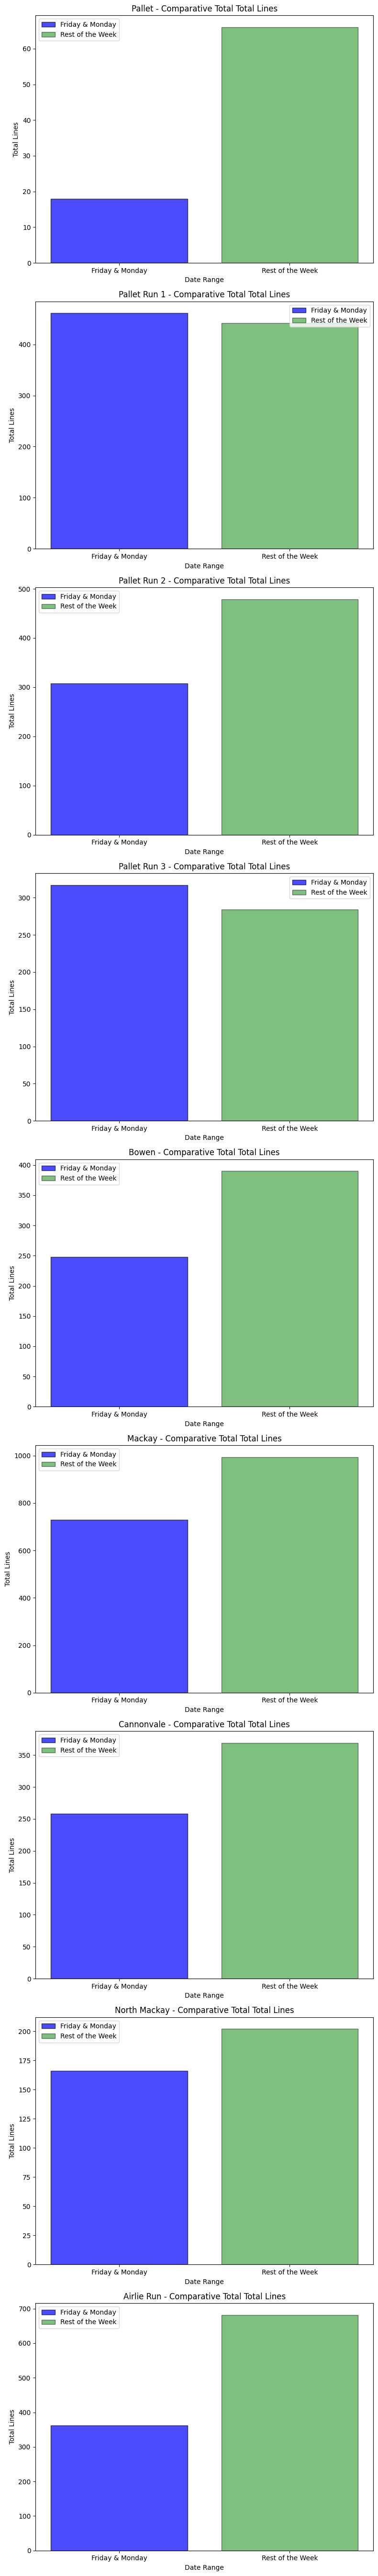

In [25]:
import matplotlib.pyplot as plt

# Assuming you have specific_dates_stats and rest_of_week_stats DataFrames

# Select the metric for comparison (e.g., 'Total Lines')
metric = 'Total Lines'

# Filter for specific delivery runs
specific_delivery_runs = ['Pallet', 'Pallet Run 1', 'Pallet Run 2', 'Pallet Run 3', 'Bowen', 'Mackay', 'Cannonvale', 'North Mackay', 'Airlie Run']

# Filter the data for specific delivery runs
specific_dates_filtered = specific_dates_stats[specific_dates_stats.index.get_level_values('Delivery Run').isin(specific_delivery_runs)]
rest_of_week_filtered = rest_of_week_stats[rest_of_week_stats.index.get_level_values('Delivery Run').isin(specific_delivery_runs)]

# Create a figure and axes for subplots
fig, axes = plt.subplots(nrows=len(specific_delivery_runs), ncols=1, figsize=(8, 6 * len(specific_delivery_runs)))

# Plot for each delivery run
for idx, delivery_run in enumerate(specific_delivery_runs):
    # Calculate total sum for specific dates and rest of the week for each delivery run
    total_specific_dates = specific_dates_filtered.loc[specific_dates_filtered.index.get_level_values('Delivery Run') == delivery_run, metric].sum()
    total_rest_of_week = rest_of_week_filtered.loc[rest_of_week_filtered.index.get_level_values('Delivery Run') == delivery_run, metric].sum()

    # Plotting the bar for each delivery run separately
    ax = axes[idx]
    ax.bar('Friday & Monday', total_specific_dates, color='blue', alpha=0.7, label='Friday & Monday', edgecolor='black')
    ax.bar('Rest of the Week', total_rest_of_week, color='green', alpha=0.5, label='Rest of the Week', edgecolor='black')

    ax.set_xlabel('Date Range')
    ax.set_ylabel(metric)
    ax.set_title(f'{delivery_run} - Comparative Total {metric}')

    ax.legend()

plt.tight_layout()
plt.show()
